In [19]:
# Machine Learning Model (Pratik):
# Economic Trend Forecast Long Short-Term Memory (LSTM)
# Using Long Short-Term Memory (LSTM) neural networks, the offered code develops a machine learning model that evaluates economic patterns including a particular focus on the link between the GDP and the unemployment rate.
# Data on the unemployment rate and GDP from 2020 to 2023 are combined and cleaned up, allowing the model to be trained to recognize periodic trends and connections.
# The LSTM architecture is a great option for time series analysis since it can handle sequential data with ease.
# Users may predict future changes in the GDP and unemployment rate using the trained model which offers useful data for financial planning, policymaking, and investment decision-making.
# Because of the model's capacity to accurately forecast and capture complex historical interactions stakeholders and investors are better equipped to predict changes in the economy and reduce risks.
# The code makes it easier to create a strong and trustworthy tool for assessing and predicting economic trends which helps different industries make well-informed decisions and implement strategic planning.


SyntaxError: invalid syntax (<ipython-input-19-eb03cba6aa23>, line 1)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-18-e91af8aeb667>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdp_data["Year - Month"] = pd.to_datetime(gdp_data["Year - Month"])


Epoch 1/100
2/2 [==============================] - 3s 731ms/step - loss: 0.1643 - val_loss: 0.3684
Epoch 2/100
2/2 [==============================] - 0s 69ms/step - loss: 0.1272 - val_loss: 0.2796
Epoch 3/100
2/2 [==============================] - 0s 62ms/step - loss: 0.0968 - val_loss: 0.2048
Epoch 4/100
2/2 [==============================] - 0s 65ms/step - loss: 0.0726 - val_loss: 0.1435
Epoch 5/100
2/2 [==============================] - 0s 77ms/step - loss: 0.0543 - val_loss: 0.0958
Epoch 6/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0422 - val_loss: 0.0624
Epoch 7/100
2/2 [==============================] - 0s 73ms/step - loss: 0.0365 - val_loss: 0.0440
Epoch 8/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0367 - val_loss: 0.0386
Epoch 9/100
2/2 [==============================] - 0s 70ms/step - loss: 0.0403 - val_loss: 0.0387
Epoch 10/100
2/2 [==============================] - 0s 50ms/step - loss: 0.0428 - val_loss: 0.0385
Epoch 11/100
2/2 [

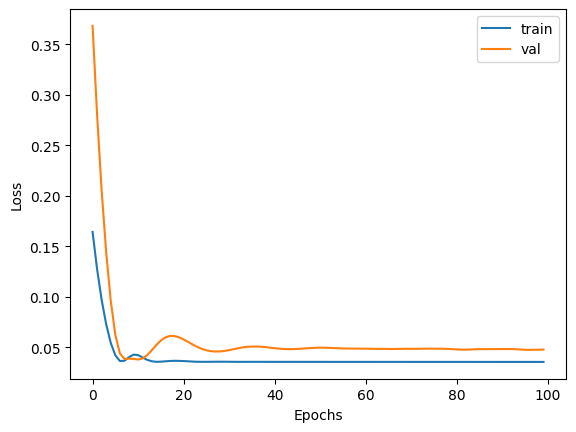

Train Loss: 0.036886364221572876, Test Loss: 0.18958568572998047


In [18]:
# Load and preprocess the data
unemployment_data = pd.read_csv("/content/drive/MyDrive/CS418_Project_Pratik/data/UnemploymentRate2011-2023.csv")
gdp_data = pd.read_csv("/content/drive/MyDrive/CS418_Project_Pratik/data/USMonthlyGDP-2011-2023.csv")

# # Filter data to include only rows with dates from 2020 to 2023
# unemployment_data = unemployment_data[(unemployment_data["DATE"] >= "2020-01-01") & (unemployment_data["DATE"] <= "2023-12-31")]
# gdp_data = gdp_data[(gdp_data["Year - Month"] >= "2020-01-01") & (gdp_data["Year - Month"] <= "2023-12-31")]

# Convert the "DATE" column to datetime format
unemployment_data["DATE"] = pd.to_datetime(unemployment_data["DATE"])

# Convert the "Year - Month" column to datetime format
gdp_data["Year - Month"] = pd.to_datetime(gdp_data["Year - Month"])

# Merge the data on the common column (DATE and Year - Month)
merged_data = pd.merge(unemployment_data, gdp_data, left_on="DATE", right_on="Year - Month", how="inner")

# Drop unnecessary columns and rename columns for clarity
merged_data.drop(columns=["DATE", "Year - Month"], inplace=True)
merged_data.columns = ["UnemploymentRate", "GDP"]

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_data)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Create sequences with a window size of 12 (one year)
seq_length = 12
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

# Plot loss during training
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")